In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import numpy 
import json
import requests
import numpy as np
from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [2]:
# BBC, CBS, CNN, Fox, and New York times.
target_user = ['@BBC', '@CBS', "@CNN", "@Fox", "@nytimes"]
filename = ["bbc_sentiment", "cbs_sentiment", "cnn_sentiment", "fox_sentiment", "nyt_sentiment"]

In [3]:
def NewsOrg_sentiment(target):
    counter = 1
    sentiments = []
    public_tweet = api.user_timeline(target, count = 100)
    
    for tweet in public_tweet :
        
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        sentiments.append({
            "twitter source account" : target,
            "Tweets ago" : tweets_ago,
            "Date" : tweet['created_at'],
            "Compound" : compound,
            'Negative' : neg,
            "Positive"  : pos,
            "Neutral"  : neu,
            "tweet_text" : tweet["text"]
            
        })
        
        counter = counter + 1
        
    data= pd.DataFrame.from_dict(sentiments)
    data.sort_index(axis=0 ,ascending=False, inplace = True)
    return  data


In [10]:
bbc_sentiment = NewsOrg_sentiment('@BBC')
cbs_sentiment = NewsOrg_sentiment('@CBS')
cnn_sentiment = NewsOrg_sentiment("@CNN")
fox_sentiment = NewsOrg_sentiment("@Fox")
nyt_sentiment = NewsOrg_sentiment("@nytimes")
bbc_sentiment.to_csv("BBC_Sentiment.csv", index=False, header=True)
cbs_sentiment.to_csv("CBS_Sentiment.csv", index=False, header=True)
cnn_sentiment.to_csv("CNN_Sentiment.csv", index=False, header=True)
fox_sentiment.to_csv("Fox_Sentiment.csv", index=False, header=True)
nyt_sentiment.to_csv("nytimes_Sentiment.csv", index=False, header=True)

In [5]:
bbc_sentiment

,twitter source account,Tweets ago,Date,Compound,Negative,Positive,Neutral,tweet_text
99,@BBC,100,Wed May 13 13:29:29 +0000 2020,0.0000,0.000,0.000,1.000,HealthCheckUK Live | Weekdays | 10am | @bbcone...
98,@BBC,99,Wed May 13 17:25:24 +0000 2020,0.0000,0.000,0.000,1.000,'It can happen to anyone.'\n\n#Hospital https:...
97,@BBC,98,Wed May 13 17:26:16 +0000 2020,0.0000,0.000,0.000,1.000,#Hospital: Coronavirus Specials are streaming ...
96,@BBC,97,Wed May 13 19:14:42 +0000 2020,-0.8316,0.322,0.049,0.629,Victorian thriller #ViennaBlood follows a juni...
95,@BBC,96,Thu May 14 08:01:00 +0000 2020,0.3612,0.000,0.135,0.865,Thank you from @bbcarts and @OwainWynEvans to ...
...,...,...,...,...,...,...,...,...
4,@BBC,5,Fri May 22 12:25:44 +0000 2020,0.3612,0.000,0.111,0.889,"RT @bbcpress: New comedy series #Staged, starr..."
3,@BBC,4,Fri May 22 12:51:33 +0000 2020,0.5473,0.000,0.150,0.850,RT @HackerTDog: GET THE #FridayFeeling BY WATC...
2,@BBC,3,Fri May 22 13:28:25 +0000 2020,-0.2263,0.079,0.000,0.921,RT @bbcworldservice: Dressing up for Eid needn...
1,@BBC,2,Fri May 22 14:01:00 +0000 2020,-0.3612,0.171,0.000,0.829,If you're finding lockdown tough because you l...


In [6]:
def plotting_scatter(x, y, color, label) :  
    return plt.scatter(x, y, c = color, alpha = 0.5,  s = 200,  label = label)

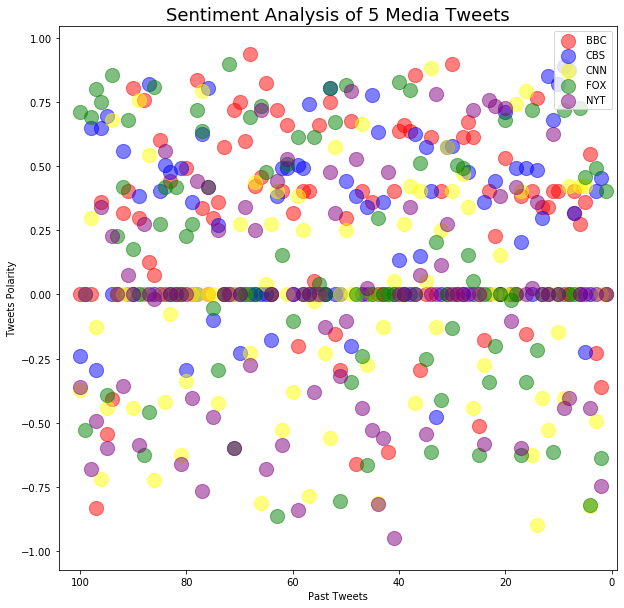

In [13]:
plt.figure(figsize =(10,10))

plotting_scatter(bbc_sentiment['Tweets ago'], bbc_sentiment['Compound'], "r", 'BBC')
plotting_scatter(cbs_sentiment['Tweets ago'], cbs_sentiment['Compound'], "b", 'CBS')
plotting_scatter(cnn_sentiment['Tweets ago'], cnn_sentiment['Compound'], "yellow", 'CNN')
plotting_scatter(fox_sentiment['Tweets ago'], fox_sentiment['Compound'], "g", 'FOX')
plotting_scatter(nyt_sentiment['Tweets ago'], nyt_sentiment['Compound'], "purple", 'NYT')

plt.legend(loc = "upper right")
plt.title("Sentiment Analysis of 5 Media Tweets" ,fontsize = 18)
plt.xlabel("Past Tweets")
plt.ylabel("Tweets Polarity")
plt.xlim(104,-1)
plt.savefig("Sentiment_Analysis_5_Media_Tweets.png")
plt.show()

In [8]:

x =  {
    "BBC" : np.mean(bbc_sentiment['Compound']), 
    "CBS" : np.mean(cbs_sentiment['Compound']),
    "CNN" : np.mean(cnn_sentiment['Compound']),
    "FOX": np.mean(fox_sentiment['Compound']),
    "NYT": np.mean(nyt_sentiment['Compound']) }
x

{'BBC': 0.25217600000000007,
 'CBS': 0.24543000000000006,
 'CNN': -0.009577,
 'FOX': 0.12741600000000003,
 'NYT': -0.01990600000000001}

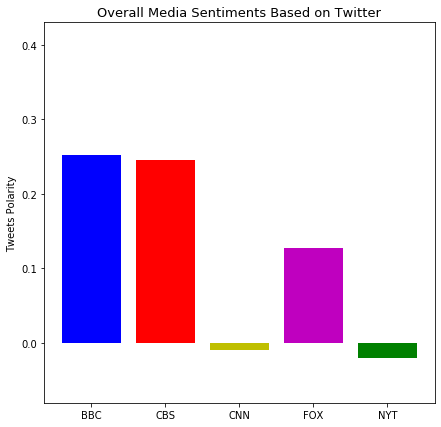

In [12]:
plt.figure(figsize = (7,7))
plt.bar(x.keys(), x.values(), color = ['b', 'r', 'y', 'm', 'g'])
plt.title('Overall Media Sentiments Based on Twitter', fontsize = 13)
plt.ylabel("Tweets Polarity")
plt.ylim(-0.08, 0.43)
plt.savefig("Overall_Media_Sentiments.png")
plt.show()